# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests 
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city   
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salekhard
Processing Record 2 of Set 1 | ati
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | port hedland
Processing Record 6 of Set 1 | vadso
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | sitka
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | colonia
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | juneau
Processing Record 16 of Set 1 | la'ie
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | fujikawaguchiko
Processing Record 20 of Set 1 | kodiak
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | west island

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salekhard,66.5300,66.6019,19.49,84,100,20.98,RU,1708474971
1,ati,13.2154,18.3353,76.98,13,20,10.92,TD,1708474971
2,grytviken,-54.2811,-36.5092,37.17,78,95,9.60,GS,1708474441
3,college,64.8569,-147.8028,44.92,63,75,4.61,US,1708474452
4,port hedland,-20.3167,118.5667,86.05,89,80,2.30,AU,1708474972


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salekhard,66.5300,66.6019,19.49,84,100,20.98,RU,1708474971
1,ati,13.2154,18.3353,76.98,13,20,10.92,TD,1708474971
2,grytviken,-54.2811,-36.5092,37.17,78,95,9.60,GS,1708474441
3,college,64.8569,-147.8028,44.92,63,75,4.61,US,1708474452
4,port hedland,-20.3167,118.5667,86.05,89,80,2.30,AU,1708474972


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

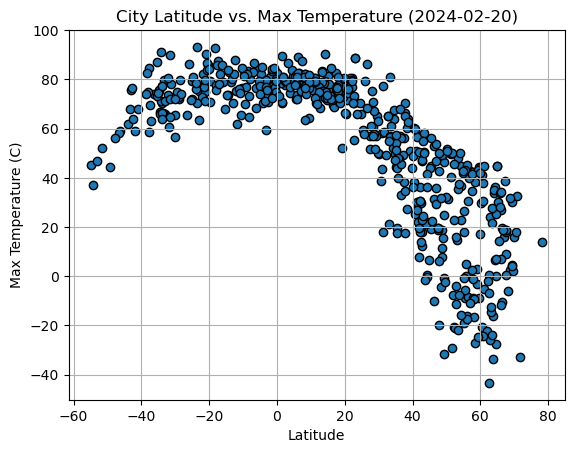

In [10]:
# Create variable for current date to add to title 
# How to get current date in python > https://www.programiz.com/python-programming/datetime/current-datetime
from datetime import date
today = date.today()
today= today.strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

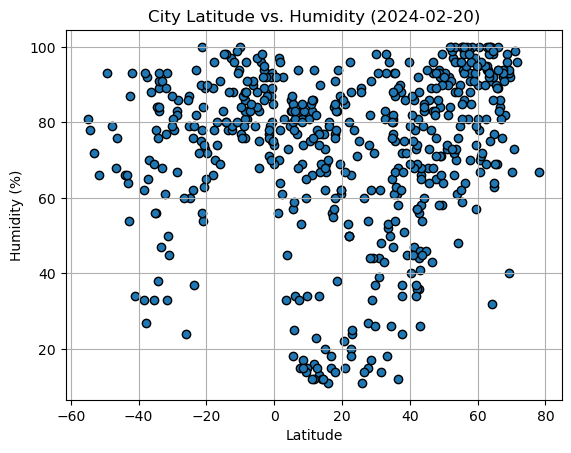

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

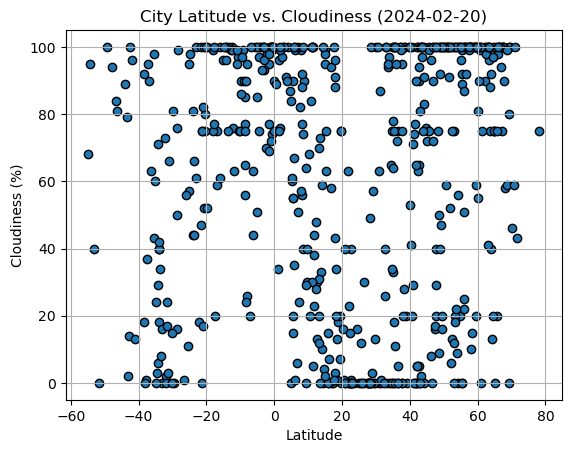

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

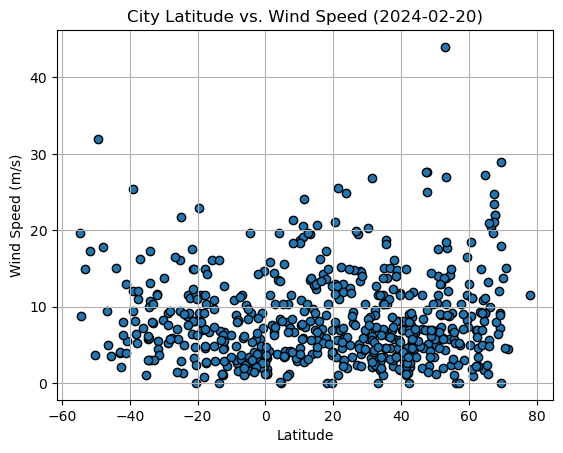

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salekhard,66.5300,66.6019,19.49,84,100,20.98,RU,1708474971
1,ati,13.2154,18.3353,76.98,13,20,10.92,TD,1708474971
3,college,64.8569,-147.8028,44.92,63,75,4.61,US,1708474452
5,vadso,70.0744,29.7487,15.96,67,46,17.27,NO,1708474557
7,sitka,57.0531,-135.3300,42.69,81,100,0.00,US,1708474441


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,37.17,78,95,9.60,GS,1708474441
4,port hedland,-20.3167,118.5667,86.05,89,80,2.30,AU,1708474972
6,waitangi,-43.9535,-176.5597,61.83,66,89,4.00,NZ,1708474462
9,blackmans bay,-43.0167,147.3167,75.52,64,2,8.23,AU,1708474472
10,margaret river,-33.9500,115.0667,70.32,89,18,13.31,AU,1708474461


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.82


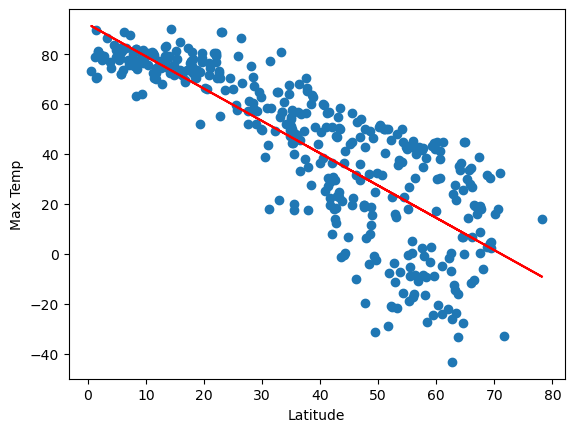

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
from scipy.stats import pearsonr
correlation = pearsonr(x_values, y_values)
print(f'The r-value is: {round(correlation[0], 2)}')

from scipy.stats import pearsonr, linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0,265),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.52


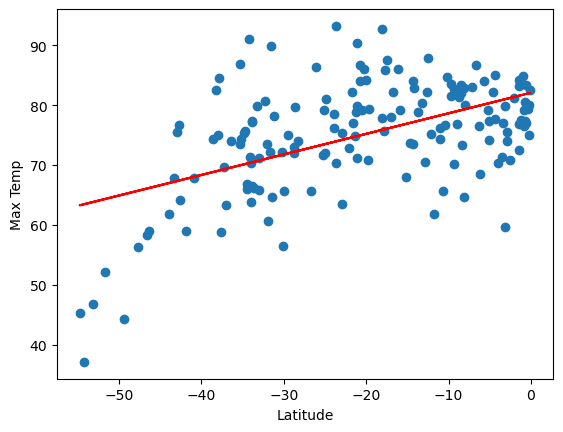

In [16]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.39


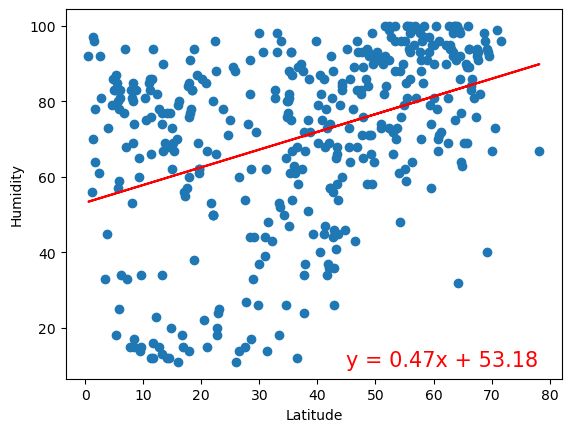

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.36


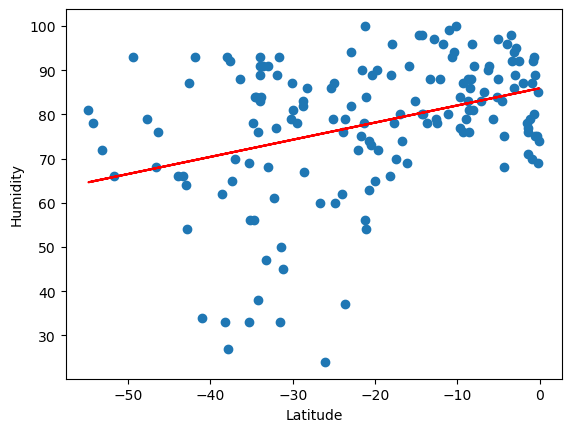

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.26


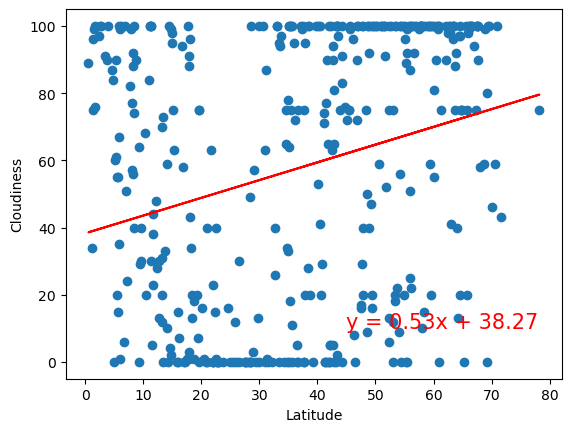

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.46


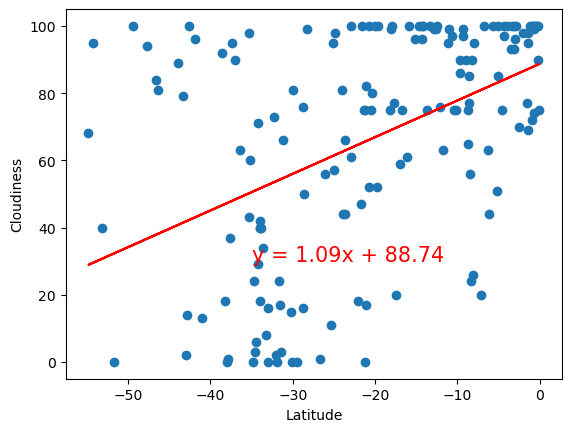

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.09


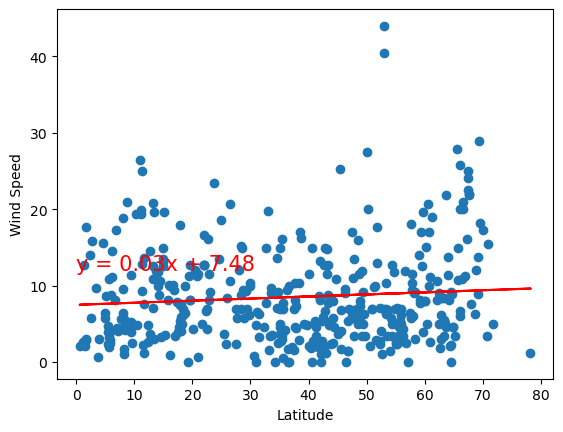

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.29


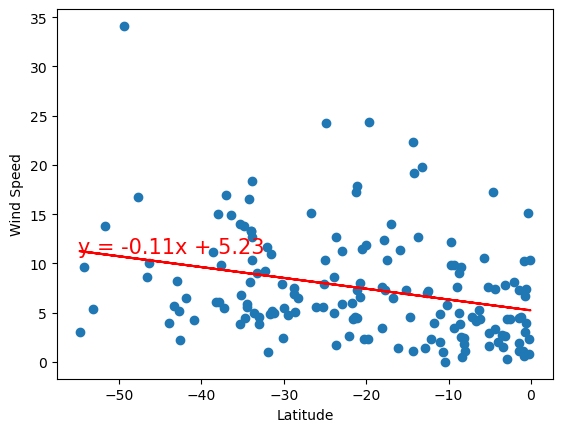

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
correlation = pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE